<a href="https://colab.research.google.com/github/drcruzm/orange/blob/main/regresionExamenok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

n_samples = 500
ventas_previas = np.random.randint(5, 500, n_samples)
gasto_publicidad = np.random.uniform(100, 250, n_samples)
temp_media = np.random.uniform(-10, 20, n_samples)
dias_hasta_navidad = np.random.randint(30, 90, n_samples)
competencia = np.random.uniform(1, 10, n_samples)
noise = np.random.normal(0, 150, n_samples)
inventario_necesario = (1.5 * ventas_previas +
                        100 * gasto_publicidad -
                        80 * temp_media -
                        50 * dias_hasta_navidad -
                        120 * competencia +
                        noise)
inventario_necesario = np.maximum(0, inventario_necesario).astype(int)

df = pd.DataFrame({
    'ventas_previas': ventas_previas,
    'gasto_publicidad': gasto_publicidad,
    'temp_media': temp_media,
    'dias_hasta_navidad': dias_hasta_navidad,
    'competencia': competencia,
    'inventario_necesario': inventario_necesario
})
df.to_csv('datos_navidad.csv', index=False)
# Mostrar las primeras 10 filas
print(df.head(25))

    ventas_previas  gasto_publicidad  temp_media  dias_hasta_navidad  \
0               21        203.475499   -9.894095                  87   
1              491        162.732349   12.106561                  64   
2              335        129.648994   -8.481204                  81   
3              225        116.330367    3.617787                  84   
4              132        134.234844    9.511427                  81   
5              489        206.722556   -8.184370                  33   
6              269        158.013163   14.897159                  63   
7              304        175.359647   -1.110133                  48   
8              324        174.166641   12.224680                  34   
9              275        142.328832   -6.919375                  64   
10             395        231.133761   10.442582                  69   
11             333        171.645625    7.682526                  53   
12             344        125.523980   16.063952                

In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Cargar y preparar datos
df = pd.read_csv('datos_navidad.csv')
X = df.drop('inventario_necesario', axis=1)
y = df['inventario_necesario']

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


In [ ]:
#print(X.head(10))
print(y.head(10))

In [21]:
# 4. Hacer predicciones
y_pred = modelo.predict(X_test)

# 5. Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f} unidades")

Coeficiente de Determinación (R²): 0.9988
Error Absoluto Medio (MAE): 124.81 unidades


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 4. Evaluar el modelo
y_pred = modelo.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 23634.27
Error Absoluto Medio (MAE): 124.81
Coeficiente de determinación (R²): 1.00


In [ ]:
import statsmodels.api as sm

# Add a constant to the features for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
modelo_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the summary
print(modelo_sm.summary())

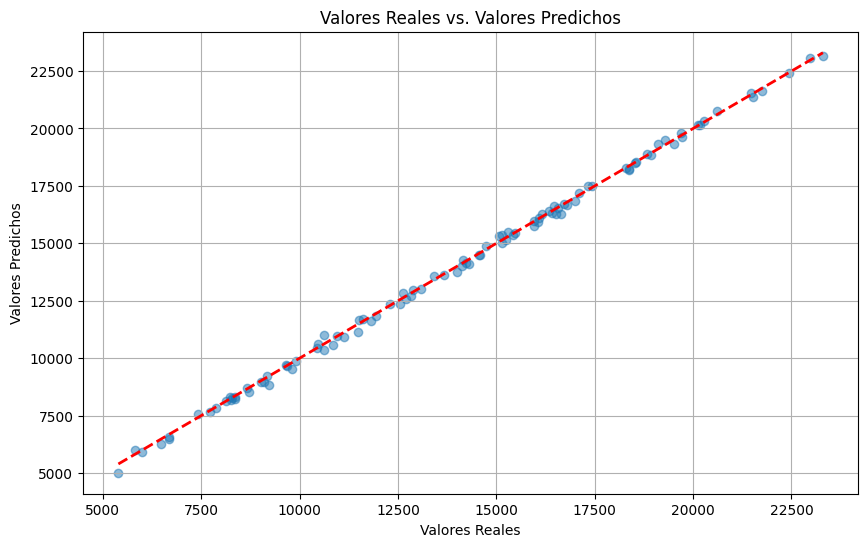

In [23]:
import matplotlib.pyplot as plt

# Graficar valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea de referencia ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos")
plt.grid(True)
plt.show()

In [14]:
# Entrenar con todos los datos para ver los coeficientes generales
modelo.fit(X, y)

coeficientes = pd.DataFrame(
    modelo.coef_,
    index=X.columns,
    columns=['Coeficiente']
)
coeficientes['Importancia'] = coeficientes['Coeficiente'].abs()
print(coeficientes.sort_values(by='Importancia', ascending=False))

                    Coeficiente  Importancia
competencia         -120.230100   120.230100
gasto_publicidad      99.905256    99.905256
temp_media           -79.809183    79.809183
dias_hasta_navidad   -49.433285    49.433285
ventas_previas         1.536426     1.536426
